# FACIAL RECOGNITION

In [1]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
lfw_people=fetch_lfw_people(min_faces_per_person=70,resize=0.4)

In [3]:
import os
for dirname, _, filenames in os.walk('lfw-funneled.tgz'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
images=lfw_people.images
images.shape

(1288, 50, 37)

In [5]:
images[2]

array([[0.3398693 , 0.39607847, 0.49150327, ..., 0.5803922 , 0.5908497 ,
        0.58431375],
       [0.38039216, 0.5084967 , 0.56993467, ..., 0.6261439 , 0.5908497 ,
        0.5764706 ],
       [0.48235294, 0.5673203 , 0.579085  , ..., 0.64183015, 0.59607846,
        0.5738563 ],
       ...,
       [0.29542485, 0.2875817 , 0.28627452, ..., 0.46013072, 0.675817  ,
        0.70457524],
       [0.28627452, 0.26666668, 0.26928106, ..., 0.5908497 , 0.7281046 ,
        0.71111107],
       [0.3150327 , 0.25490198, 0.25751635, ..., 0.7098039 , 0.72287583,
        0.7176471 ]], dtype=float32)

In [6]:
images.size

2382800

In [7]:
target_name=lfw_people.target_names
target_name

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [21]:
target_name.shape


(7,)

In [23]:
target_name.size

7

There are 1288 observations with 7 values(people) in it.

In [25]:
# As it is already flatterened we are directly adding to X; Y-> integer value of the target name
x=lfw_people.data
y=lfw_people.target

Text(0.5, 1.0, 'Hugo Chavez')

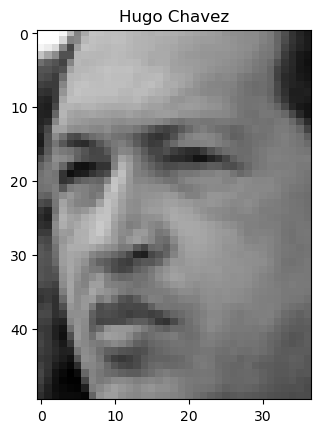

In [27]:
# Plotting the images
plt.imshow(images[0],cmap='gray')
plt.title(target_name[lfw_people.target[0]])

Text(0.5, 1.0, 'George W Bush')

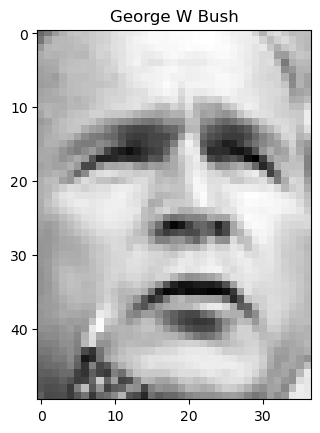

In [29]:
plt.imshow(images[2],cmap='gray')
plt.title(target_name[lfw_people.target[2]])

In [31]:
# Ploting some images from dataset
#Randomly picking an image using Index 

rand_ind=np.random.choice(x.shape[0],10)
rand_ind

array([ 291,   35,  146,  746, 1059,  411,  716,  348,  915,  809])

In [33]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
x = lfw_people.data
y = lfw_people.target


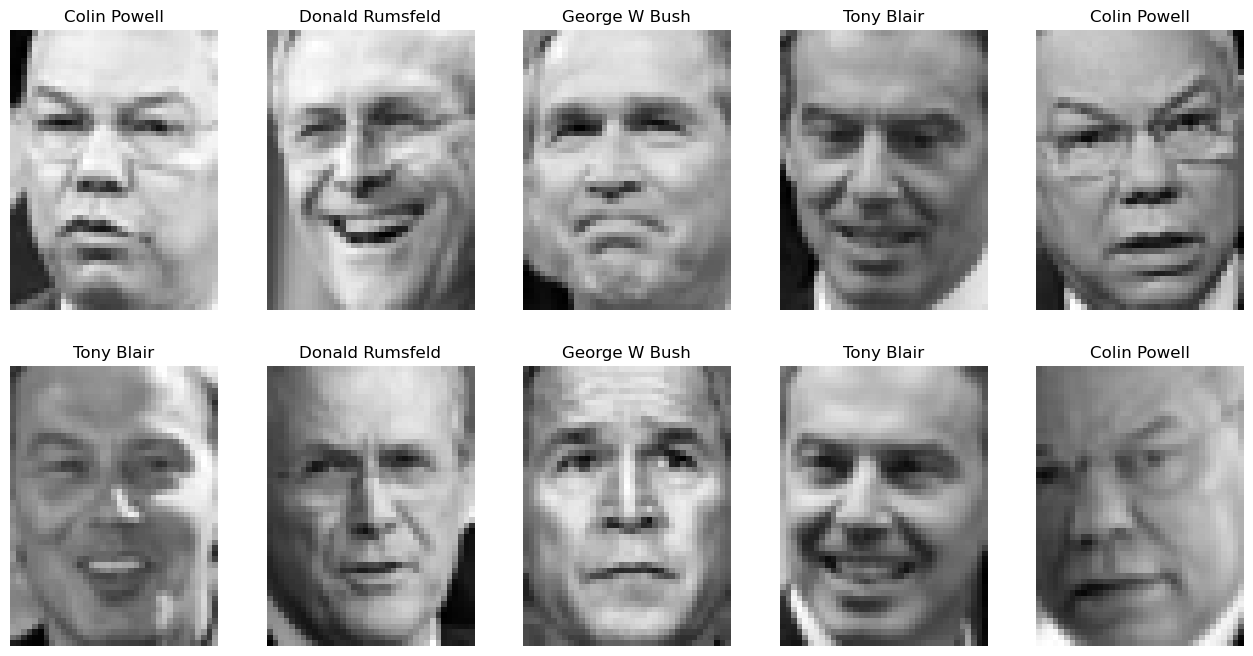

In [37]:
# Generate random indices to select random images from the dataset
np.random.seed(42)  # For reproducibility
num_images_to_display = 10  # Change this number to display more or fewer images
rand_ind = np.random.randint(0, len(x), size=num_images_to_display)

fig, ax = plt.subplots(2, 5, figsize=(16, 8))
for i in range(2):
    for j in range(5):
        img = x[rand_ind[i * 5 + j]].reshape(50, 37)
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].set_title(lfw_people.target_names[y[rand_ind[i * 5 + j]]])
        ax[i, j].axis('off')

plt.show()

In [39]:
def show_orignal_images(x):
    # Displaying Original Images
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                             subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i].reshape(50, 37), cmap='gray')
    plt.show()

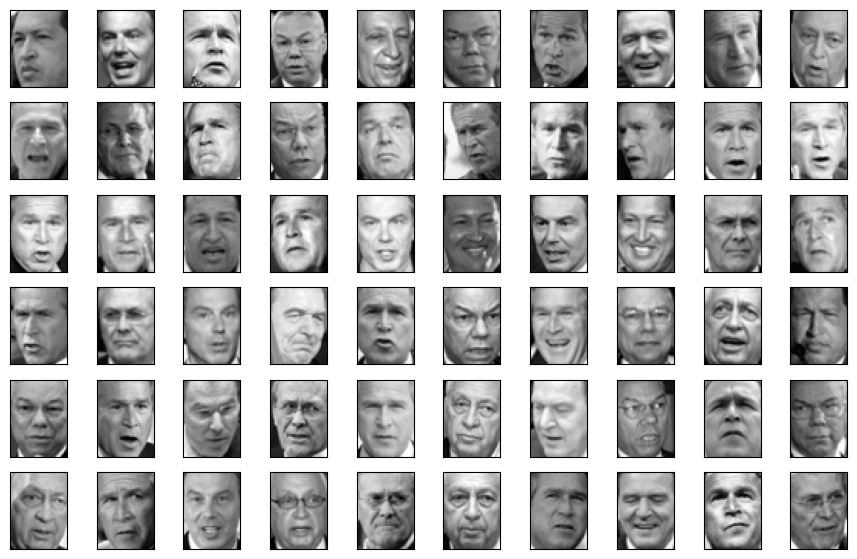

In [41]:
x = x.reshape(-1, 50, 37)
show_orignal_images(x)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1984)

In [45]:
from sklearn.decomposition import PCA

In [47]:
num_samples, height, width = x_train.shape
x_train_2d = x_train.reshape(num_samples, height * width)

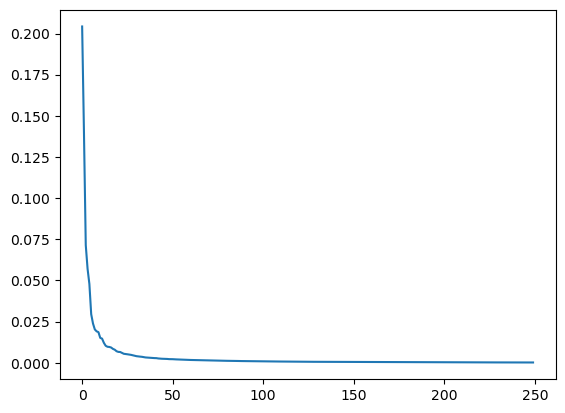

In [49]:
# PCA is going to happen on training dataset such that the number of features will be reduced to 150 PCA. The results will be in pca object

pca=PCA(n_components=250).fit(x_train_2d)
plt.plot(pca.explained_variance_ratio_)
plt.show()


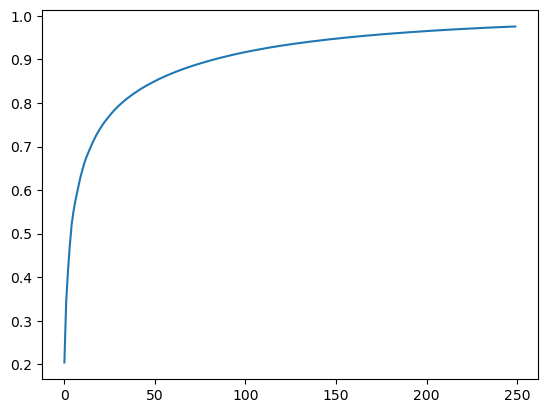

In [51]:
pca=PCA(n_components=250).fit(x_train_2d)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

Show Eigen Faces

A set of eigenfaces can be generated by performing a mathematical process called principal component analysis (PCA) on a large set of images depicting different human faces. Informally, eigenfaces can be considered a set of "standardized face ingredients", derived from statistical analysis of many pictures of faces.

In [53]:
def show_eigenfaces(pca):
    # Displaying Eigenfaces
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                             subplot_kw={'xticks': [], 'yticks': []})
    eigenfaces = pca.components_.reshape(-1, 50, 37)  # Reshape eigenfaces to match image size
    for i, ax in enumerate(axes.flat):
        ax.imshow(eigenfaces[i], cmap='gray')
        ax.set_title("PC " + str(i + 1))
    plt.show()

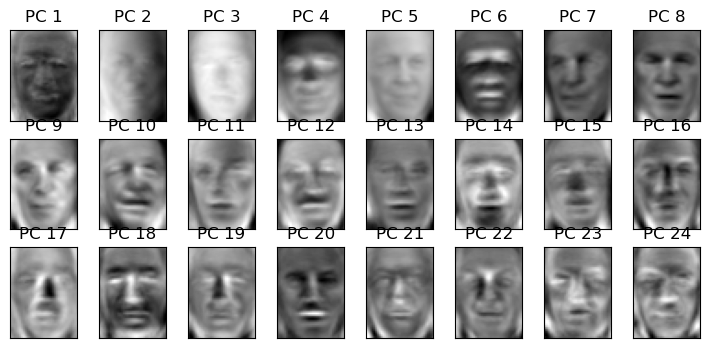

In [55]:
show_eigenfaces(pca)

In [57]:
def show_eigenfaces(pca, original_images):
    # Displaying Eigenfaces and Original Images
    fig, axes = plt.subplots(3, 8, figsize=(12, 6),
                             subplot_kw={'xticks': [], 'yticks': []})
    eigenfaces = pca.components_.reshape(-1, 50, 37)  # Reshape eigenfaces to match image size
    for i, ax in enumerate(axes.flat):
        if i < len(eigenfaces):
            ax.imshow(eigenfaces[i], cmap='gray')
            ax.set_title("Eigenface " + str(i + 1))
        else:
            ax.imshow(original_images[i - len(eigenfaces)], cmap='gray')
            ax.set_title("Original Image " + str(i - len(eigenfaces) + 1))
    plt.show()

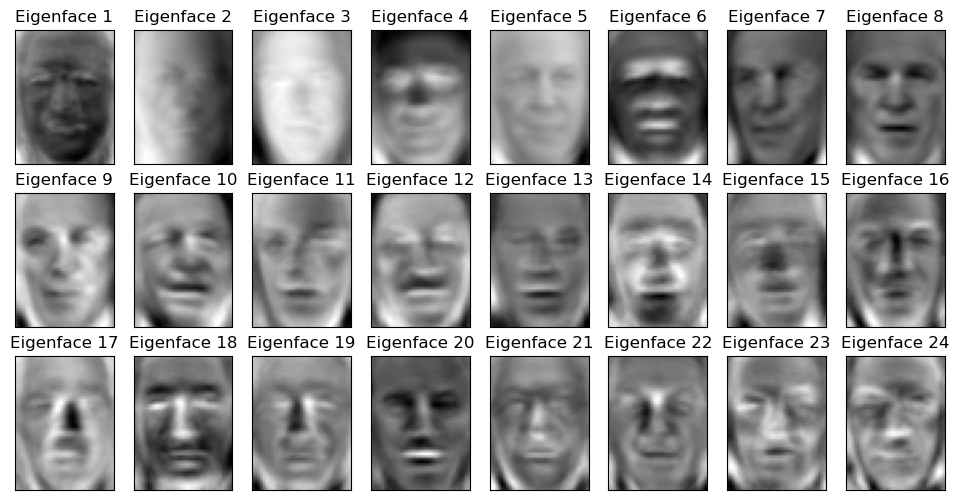

In [59]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
original_images = lfw_people.images
# Perform PCA and obtain `pca` object

show_eigenfaces(pca, original_images)

Training Data to Pca

In [62]:
num_samples_test, height_test, width_test = x_test.shape
x_test_2d = x_test.reshape(num_samples_test, height_test * width_test)

In [64]:
# Now transform x_train and x_test dataset such that each observations is projected on this 150 components
x_train_pca=pca.transform(x_train_2d)
x_test_pca=pca.transform(x_test_2d)

Initialize a classifier and fit Training

 SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes

In [66]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
clf=SVC(kernel='rbf',class_weight='balanced')
clf.fit(x_train_pca,y_train)

SVC(class_weight='balanced')

Checking the score

In [72]:
clf.score(x_test_pca,y_test)

0.7608695652173914

Confusion matrix

In [74]:
from sklearn import metrics
y_pred_pca=clf.predict(x_test_pca)
cm=confusion_matrix(y_test,y_pred_pca,labels=range(len(target_name)))
cm

array([[ 10,   1,   2,   2,   0,   2,   0],
       [  2,  46,   1,  11,   1,   1,   1],
       [  1,   2,  17,   5,   0,   0,   0],
       [  0,   7,   5, 111,   3,   2,   4],
       [  1,   1,   2,   1,  16,   1,   1],
       [  0,   1,   0,   2,   2,  13,   0],
       [  0,   4,   0,   5,   3,   0,  32]], dtype=int64)

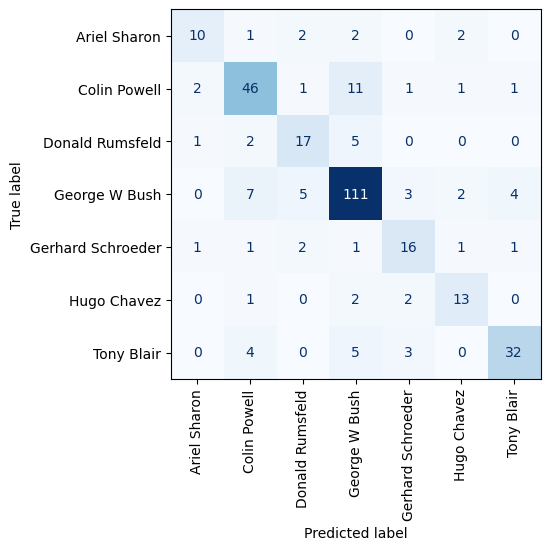

In [76]:
display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = target_name)
display.plot(cmap='Blues',colorbar=False,xticks_rotation='vertical')

In [77]:
print(classification_report(y_test,y_pred_pca,target_names=target_name))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.59      0.65        17
     Colin Powell       0.74      0.73      0.74        63
  Donald Rumsfeld       0.63      0.68      0.65        25
    George W Bush       0.81      0.84      0.83       132
Gerhard Schroeder       0.64      0.70      0.67        23
      Hugo Chavez       0.68      0.72      0.70        18
       Tony Blair       0.84      0.73      0.78        44

         accuracy                           0.76       322
        macro avg       0.72      0.71      0.72       322
     weighted avg       0.76      0.76      0.76       322

